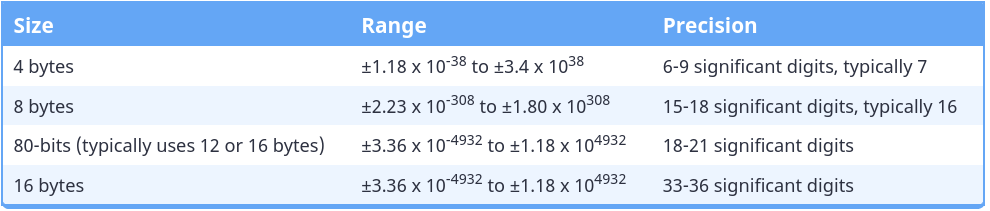

In [ ]:
%%writefile Floating_point_precision_1.cpp

int main()
{
    float fValue;
    double dValue;
    long double ldValue;
    
    return 0;
}


In [ ]:
!g++ -o FPT_1 Floating_point_precision_1.cpp

In [ ]:
!./FPT_1

In [ ]:
%%writefile Floating_point_precision_2.cpp

#include <iostream>

int main()
{
    std::cout << 5.0 << '\n';
    std::cout << 6.7f << '\n';
    std::cout << 9876543.21 << '\n';

    return 0;
}

In [ ]:
!g++ -o FPT_2 Floating_point_precision_2.cpp

In [ ]:
!./FPT_2

# Floating point range


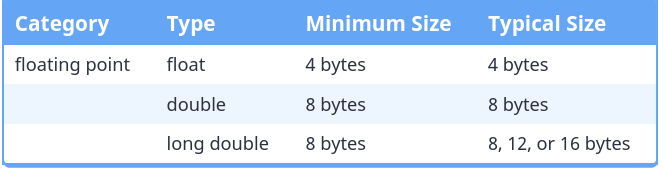

In [ ]:
%%writefile Floating_point_precision_3.cpp

#include <iostream>
#include <iomanip> // for output manipulator std::setprecision()

int main()
{
    std::cout << std::setprecision(16); // show 16 digits of precision
    std::cout << 3.33333333333333333333333333333333333333f <<'\n'; // f suffix means float
    std::cout << 3.33333333333333333333333333333333333333 << '\n'; // no suffix means double

    return 0;
}

In [ ]:
!g++ -o FPT_3 Floating_point_precision_3.cpp

In [ ]:
!./FPT_3

Precision issues don’t just impact fractional numbers, they impact any number with too many significant digits. Let’s consider a big number:

In [ ]:
%%writefile Floating_point_precision_4.cpp

#include <iomanip> // for std::setprecision()
#include <iostream>

int main()
{
    float f { 123456789.0f }; // f has 10 significant digits
    std::cout << std::setprecision(9); // to show 9 digits in f
    std::cout << f << '\n';

    return 0;
}

In [ ]:
!g++ -o FPT_4 Floating_point_precision_4.cpp

In [ ]:
!./FPT_4.exe

# Rounding errors make floating point comparisons tricky

In [ ]:
%%writefile Floating_point_precision_5.cpp

#include <iomanip> // for std::setprecision()
#include <iostream>

int main()
{
    double d{0.1};
    std::cout << d << '\n'; // use default cout precision of 6
    std::cout << std::setprecision(17);
    std::cout << d << '\n';

    return 0;
}

In [ ]:
!g++ -o FPT_5 Floating_point_precision_5.cpp

In [ ]:
!./FPT_5

Rounding errors can have unexpected consequences:

In [ ]:
%%writefile Floating_point_precision_6.cpp

#include <iomanip> // for std::setprecision()
#include <iostream>

int main()
{
    std::cout << std::setprecision(17);

    double d1{ 1.0 };
    std::cout << d1 << '\n';

    double d2{ 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 }; // should equal 1.0
    std::cout << d2 << '\n';

    return 0;
}

In [ ]:
!g++ -o FPT_6 Floating_point_precision_6.cpp

In [ ]:
!./FPT_6

# NaN and Inf

There are two special categories of floating point numbers. The first is Inf, which represents infinity. Inf can be positive or negative. The second is NaN, which stands for “Not a Number”. There are several different kinds of NaN (which we won’t discuss here). NaN and Inf are only available if the compiler uses a specific format (IEEE 754) for floating point numbers. If another format is used, the following code produces undefined behavior.

Here’s a program showing all three:

In [ ]:
%%writefile Floating_point_precision_7.cpp

#include <iostream>

int main()
{
    double zero {0.0};
    double posinf { 5.0 / zero }; // positive infinity
    std::cout << posinf << '\n';

    double neginf { -5.0 / zero }; // negative infinity
    std::cout << neginf << '\n';

    double nan { zero / zero }; // not a number (mathematically invalid)
    std::cout << nan << '\n';

    return 0;
}

In [ ]:
!g++ -o FPT_7 Floating_point_precision_7.cpp

In [ ]:
!./FPT_7

In [ ]:
%%writefile session_example.cpp

#include <time.h>
#include <cstdio>
#include <iostream>
#include <fstream>

using namespace std;

#define n 1000

int main()
{

int i,j;
int m[n][n];
double time_first, time_second;
int tmax=1000;

clock_t t1, t2, t3, t4;

//first
t1 = clock();
for (int t=0; t<tmax; t++){

for(i=0; i<n; i++)
    for(j=0; j<n; j++)
        m[i][j] = i+j;
}

t2=clock();
time_first = (t2 -t1)/(CLOCKS_PER_SEC);
//second
t3=clock();
for (int t=0; t<tmax; t++){
for(j=0; j<n; j++)
    for(i=0; i<n; i++)
        m[i][j] = i+j;

}
t4=clock();
time_second = (t4 -t3)/(CLOCKS_PER_SEC);

cout <<"time of first array accesssing is : "<<time_first<<endl;
cout <<"time of second array accesssing is : "<<time_second<<endl;

}

In [ ]:
!g++ -o FPT_8 session_example.cpp

In [ ]:
!./FPT_8